## Uber Supply-Demand Gap Case Study 
by:- Amrendra Singh Rathore

### Business Objectives

The aim of analysis is to identify the root cause of the problem (i.e. cancellation and non-availability of cars) and recommend ways to improve the situation. As a result of your analysis, you should be able to present to the client the root cause(s) and possible hypotheses of the problem(s) and recommend ways to improve them.  

## <font color='blue'>Reading and Inspection</font>

-  ### Import and read

Import and read the uber database. Store it in a variable called `Uber`.

In [1]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
#Reading uber data 
Uber = pd.read_csv("Uber Request Data.csv")

#Checking first few entries of the dataframe. 
Uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


-  ### Inspect the dataframe

Inspect the dataframe's columns, shapes, variable types etc.

In [3]:
#Inspecting the dataset
Uber.info()

print(Uber.shape)

Uber.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB
(6745, 6)


,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


## <font color='blue'>Cleaning the Data</font>

-  ### Inspect Null values

Find out the number of Null values in all the columns and rows. Also, find the percentage of Null values in each column. Round off the percentages upto two decimal places.

In [4]:
#checking for null values in column 
Uber.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [5]:
#Conveting Request timestamp and Drop timestamp into datetime
Uber['Request timestamp']=pd.to_datetime(Uber['Request timestamp'],dayfirst=True)
Uber['Drop timestamp']=pd.to_datetime(Uber['Drop timestamp'],dayfirst=True)
Uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT


In [6]:
#Checking duplicated rows in request id
Uber["Request id"].duplicated().sum()

0

In [7]:
#Checking the null values of Drivers id
Uber[np.isnan(Uber['Driver id'])]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
4095,1362,City,NaN,No Cars Available,2016-07-11 00:02:00,NaT
4096,1364,City,NaN,No Cars Available,2016-07-11 00:06:00,NaT
4097,1366,City,NaN,No Cars Available,2016-07-11 00:09:00,NaT
4098,2,Airport,NaN,No Cars Available,2016-07-11 00:23:00,NaT
4099,7,Airport,NaN,No Cars Available,2016-07-11 00:30:00,NaT
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT


In [8]:
#Imputing NaN values with 0 in driver id 
Uber['Driver id'] = Uber[['Driver id']].fillna(0).astype(int)
Uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          6745 non-null   int32         
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int32(1), int64(1), object(2)
memory usage: 289.9+ KB


In [9]:
#Checkin the  NaT values of Drop timestamp
Uber[np.isnat(Uber['Drop timestamp'])]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
2831,2905,City,1,Cancelled,2016-07-13 06:08:41,NaT
2832,4805,City,1,Cancelled,2016-07-14 17:07:58,NaT
2833,5202,Airport,1,Cancelled,2016-07-14 20:51:37,NaT
2834,5927,City,1,Cancelled,2016-07-15 10:12:40,NaT
2835,2347,Airport,2,Cancelled,2016-07-12 19:14:00,NaT
...,...,...,...,...,...,...
6740,6745,City,0,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,0,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,0,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,0,No Cars Available,2016-07-15 23:54:39,NaT


In [10]:
#Droping Drop timestamp column as we will not be using it for analysis.
Uber = Uber.drop(['Drop timestamp'], axis=1) 

In [11]:
#Checking null value percetage in each column
round(100*(Uber.isnull().sum()/len(Uber.index)), 2)

Request id           0.0
Pickup point         0.0
Driver id            0.0
Status               0.0
Request timestamp    0.0
dtype: float64

In [12]:
# Creating a new column request hour from the request timestamp column
Uber['Request hour'] = Uber['Request timestamp'].apply(lambda x: x.strftime('%H'))
Uber['Request hour'] =  Uber['Request hour'].astype(int)
Uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request hour
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8


In [13]:
# Creating a new column from the hours column by categorizing it into
# Early morning (4:00 to 7:59)
# Morning (8:00 to 11:59)
# Afternoon (12:00 to 15:59)
# Evening (16:00 to 19:59)
# Night (20:00 to 23:59)
# late Night (24:00 to 3:59)

def timecategory(x):
    if x >= 4 and x < 8:
        return 'Early Morning'
    elif x >= 8 and x < 12:
        return 'Morning'
    elif x >= 12 and x < 16:
        return 'Afternoon'
    elif x >= 16 and x < 20:
        return 'Evening'
    elif x >= 20:
        return 'Night'
    elif x >= 0 and x < 4:
        return 'Late Night'
    
Uber['Request time'] = Uber['Request hour'].apply(timecategory)
Uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request hour,Request time
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11,Morning
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17,Evening
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9,Morning
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21,Night
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8,Morning


In [14]:
# Creatig a new column Request day by fetching the day of week from the request timestamp column

Uber['Request day'] = Uber['Request timestamp'].dt.day_name()
Uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request hour,Request time,Request day
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11,Morning,Monday
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17,Evening,Monday
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9,Morning,Tuesday
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21,Night,Tuesday
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8,Morning,Wednesday


## <font color='blue'>Data Analysis</font>

-  #### Analyse the number of requests for all Trip Status ( Trip Completed, Cancelled and No Cars Available)

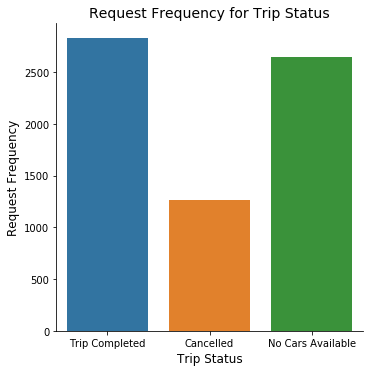

In [15]:
#Ploting request frequency for trip status

sns.catplot(x="Status", kind="count", data=Uber)

plt.title('Request Frequency for Trip Status', fontsize = 14)
plt.xlabel("Trip Status", fontsize = 12)
plt.ylabel("Request Frequency", fontsize = 12)

plt.show()

From Above plot we can easily see that  "No cars available" status is more frequent than the number of trips 

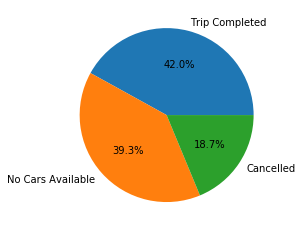

In [16]:
#Plotig above plot percentage usig pie chart
#Status distribution in pie Chart
Uber.loc[(Uber.Status =="Trip Completed"),'TripComp'] =1
Uber.loc[(Uber.Status =="No Cars Available"),'NoCars'] =1
Uber.loc[(Uber.Status =="Cancelled"),'Cancel'] =1


labels = ['Trip Completed', 'No Cars Available', 'Cancelled']
sizes = [Uber['TripComp'].value_counts()[1],
         Uber['NoCars'].value_counts()[1],
         Uber['Cancel'].value_counts()[1],
         ]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

It can be seen that percentage of no cars available is more as compared to cancelled.

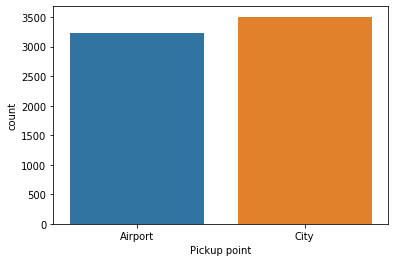

In [17]:
#Ploting a countplot of pickup point 
sns.countplot(x="Pickup point", data=Uber)
plt.show()


From above plot it can be seen that tere are two pickup points **Airport** and **City**. 

They have almost equal request however city have slightly more requests than airport. 

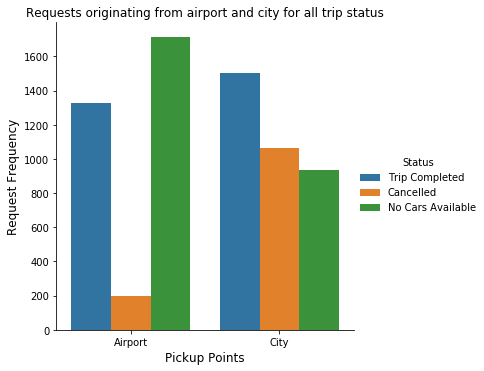

In [18]:
#Ploting frequecy of request at pickup points segmeted by status 
sns.catplot(x="Pickup point", hue="Status", kind="count", data=Uber);

plt.title('Requests originating from airport and city for all trip status', fontsize = 12)
plt.xlabel("Pickup Points", fontsize = 12)
plt.ylabel("Request Frequency", fontsize = 12)


plt.show()

From above plot it can be see that :-

- **No Cars Available** status count is more at airport 
- **Cancelled** status count is more at city.

[]

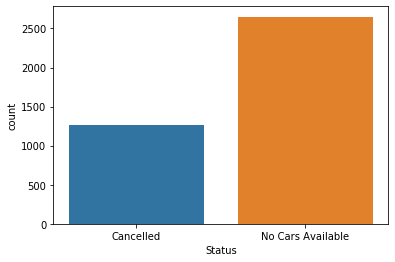

In [19]:
#Ploting frequency of requests that get cancelled or show 'No cars Available'

sns.countplot(x="Status", data=Uber[Uber.Status != 'Trip Completed'])
plt.plot()

From above plot it an be clearly seen that the status of **No Cars available** is more than the **Cancelled** .

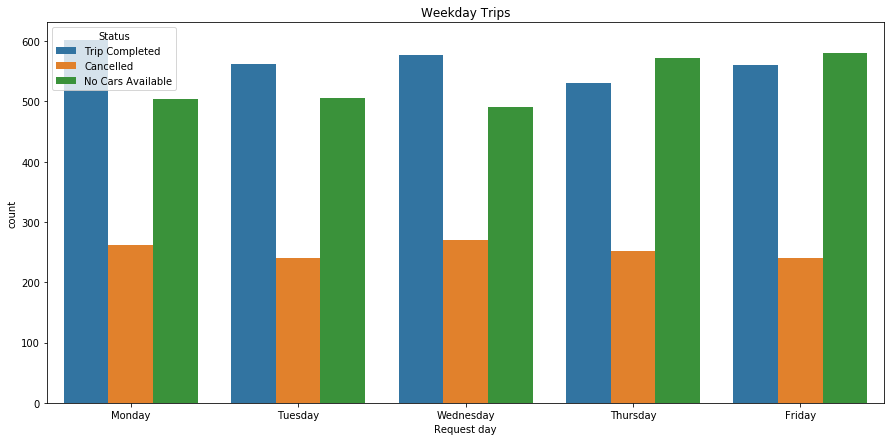

In [20]:
#Ploting Request status for each day
plt.figure(figsize=(15,7))
plt.title("Weekday Trips")
sns.countplot(x="Request day",hue='Status',data=Uber)
plt.show()


From above plot it can be see that the cancelled trip frequency is almost constant.

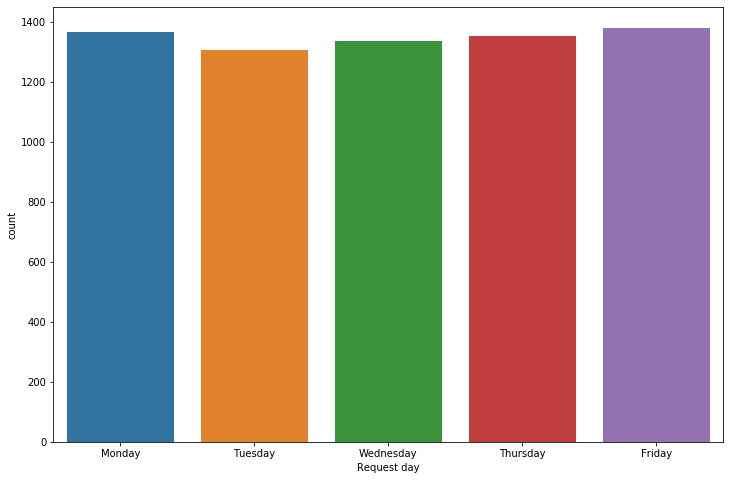

In [21]:
#Ploting request count vs Rquest day 
plt.figure(figsize=(12, 8))
sns.countplot(x='Request day', data=Uber)
plt.show()


It can be see that there isn't much difference in request on weekdays

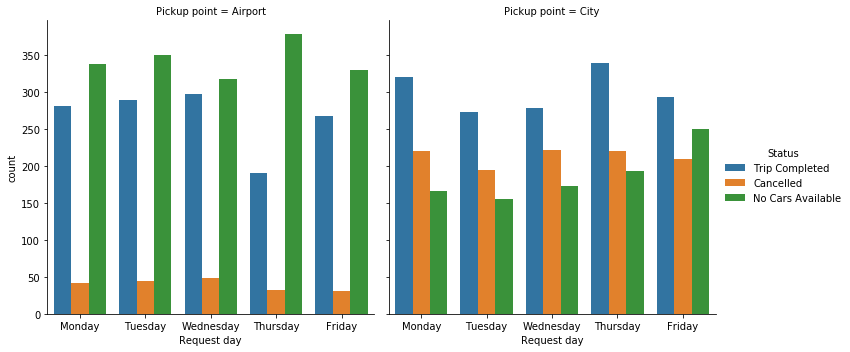

In [22]:
#Ploting request status at different pickup points in week days
#Ordering days
order_days = ['Monday','Tuesday','Wednesday','Thursday','Friday']

sns.catplot(x="Request day", col= 'Pickup point', hue="Status", kind="count", 
            data=Uber[Uber["Status"]!= "Trip completed"], order=order_days);

plt.show()

From above plot it can be seen that -
- For trips from city - airport, except for friday, cancelled trips are more for all other days of week
- For trips from airport - city, for all days there are more number of No Cars Available

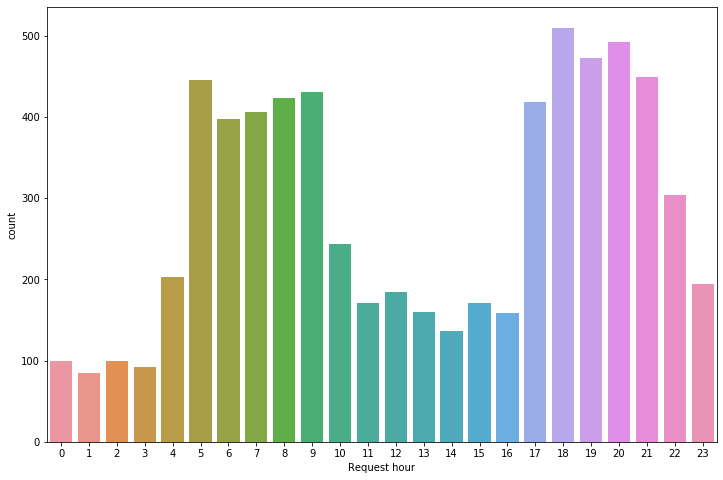

In [23]:
#Ploting a countplot for request hour
plt.figure(figsize=(12, 8))
sns.countplot(x='Request hour', data=Uber)
plt.show()

From above plot it can be seen that the requesti early and late hour is more.

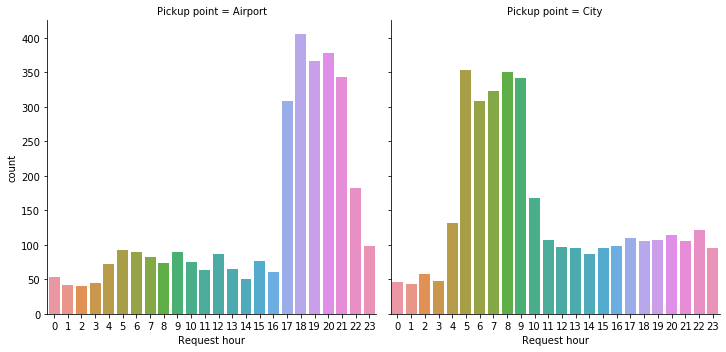

In [24]:
# Ploting hourly distribution by Pickup point

sns.catplot(x="Request hour",col="Pickup point",kind="count", data=Uber)
plt.show()

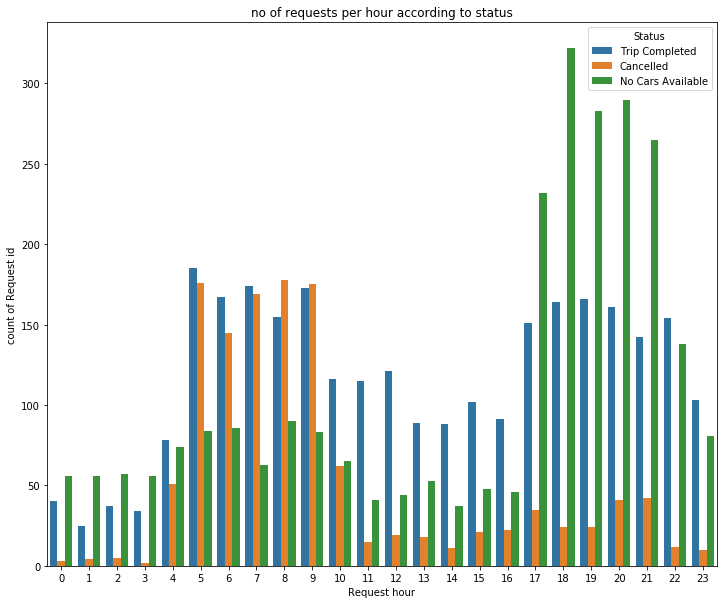

In [25]:
#now plotting for requests per hour according to status 
plt.figure(figsize=(12,10))
sns.barplot(x='Request hour',y='Request id',hue='Status',data=Uber,estimator=len)
plt.title("no of requests per hour according to status")
plt.ylabel("count of Request id")
plt.show()

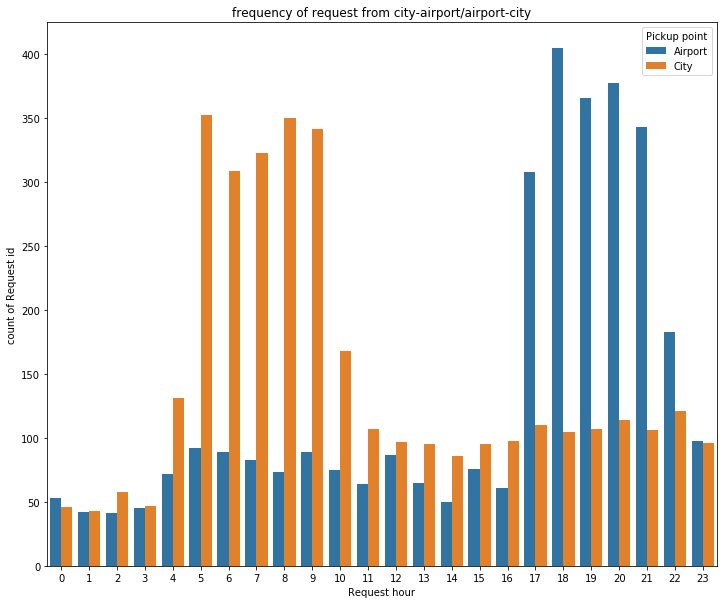

In [26]:
#plot of no. of requests from city to airport/airport to city
plt.figure(figsize=(12,10))
sns.barplot(x='Request hour', y='Request id', hue='Pickup point',data=Uber, estimator=len)
plt.title("frequency of request from city-airport/airport-city")
plt.ylabel("count of Request id")
plt.show()

From above plot it can be seen why that there are higher request during **Morning** and **Evening** hours which is expected as it is rus hour

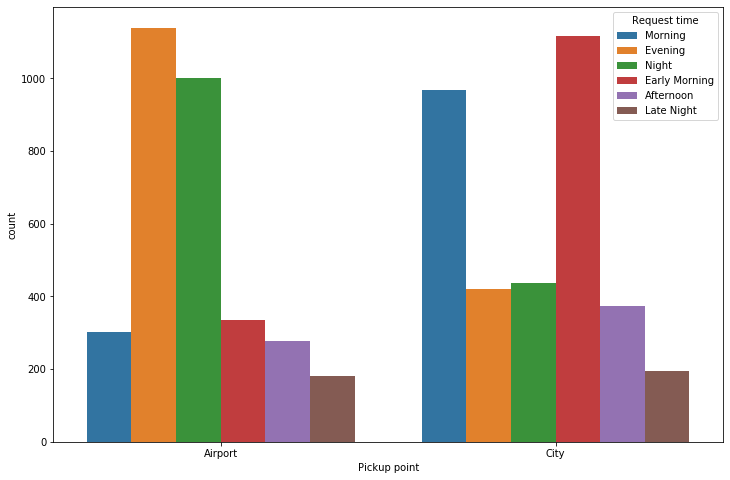

In [27]:
#Ploting pickup point segmented by time slot
plt.figure(figsize=(12, 8))
sns.countplot(x='Pickup point', hue="Request time", data=Uber)
plt.show()



From above plot it can be see that **Airport** has higher request in **Evening**

and **City** has higher request in the **Morning**.

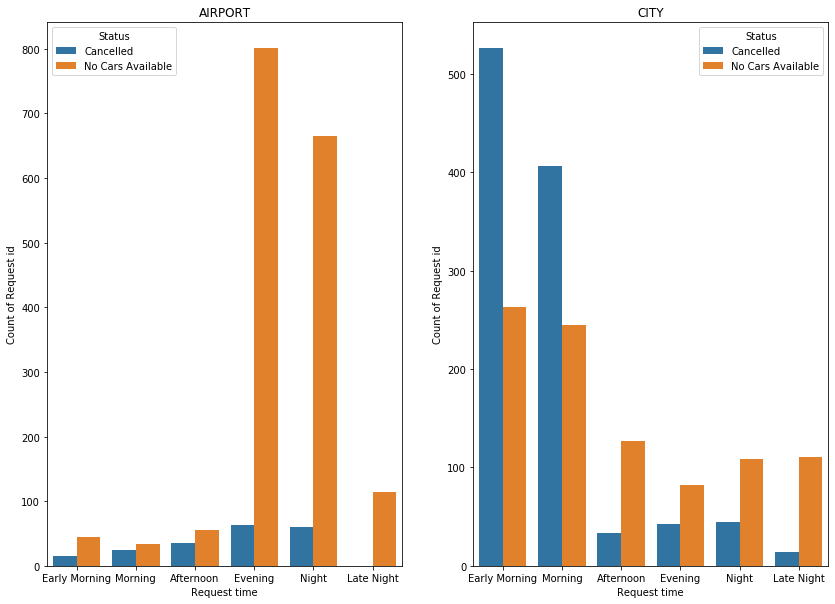

In [28]:
#plots of frquency of request
order_timeslot = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night']
plt.figure(figsize=(14,10))

plt.subplot(1,2,1)
airport = Uber[(Uber['Pickup point']=='Airport')&(Uber['Status']!='Trip Completed')]
sns.barplot(x='Request time',y='Request id',hue='Status',data=airport,estimator=len,order = order_timeslot)
plt.title("AIRPORT")
plt.ylabel("Count of Request id")


plt.subplot(1,2,2)
city = Uber[(Uber['Pickup point']=='City')&(Uber['Status']!='Trip Completed')]
sns.barplot(x='Request time',y='Request id',hue='Status',data=city,estimator=len, order = order_timeslot)
plt.title("CITY")
plt.ylabel("Count of Request id")
plt.show()

The above plot shows that for most of the  Airport pickup requests there are no cars available and most requests that get cancelled are from city pickup requests

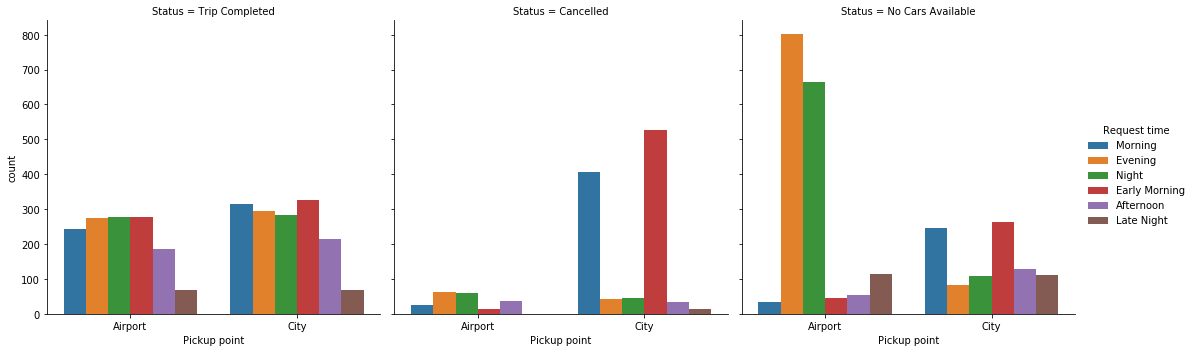

In [29]:
#segmenting the timeslot vs both Status and pickup point 

sns.catplot(x='Pickup point',col="Status", hue = 'Request time',data=Uber ,kind="count")
plt.show()


From the below plot it is evident that:
- Airport requests during the evening slot(during which there is high airport request rate)there are no cars available
- Most city requests get cancelled in the morning slot(during which there is high city request rate) 

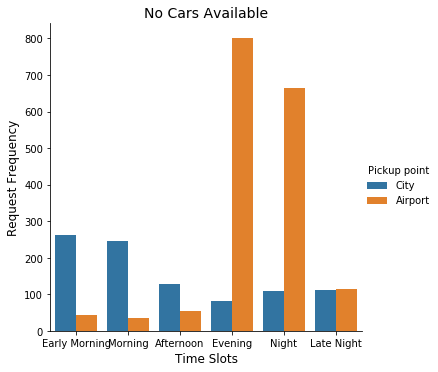

In [30]:
no_car = Uber[(Uber['Status'] == 'No Cars Available')]

sns.catplot(x="Request time", hue="Pickup point", kind="count", data=no_car, order = order_timeslot)

plt.title('No Cars Available', fontsize = 14)
plt.ylabel('Request Frequency', fontsize = 12)
plt.xlabel('Time Slots', fontsize = 12)
plt.show()

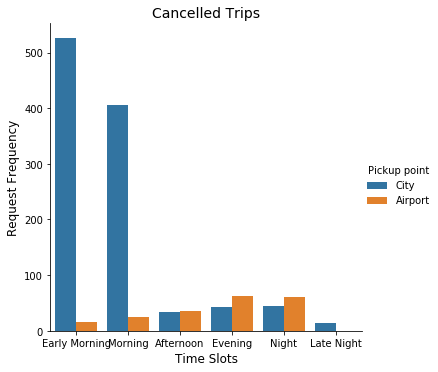

In [31]:
# The order of display of time slot
order_timeslot = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night']

cancelled = Uber[(Uber['Status'] == 'Cancelled')]

sns.catplot(x="Request time", hue="Pickup point", kind="count", data=cancelled, order = order_timeslot)
plt.title('Cancelled Trips', fontsize = 14)
plt.ylabel("Request Frequency", fontsize = 12)
plt.xlabel("Time Slots", fontsize = 12)

plt.show()

From the above graph it can be seen that maximum number of cars not available are from airport - city, during the evening hours followed by night.

#### Identify the approximate hour when more cars are unavailable during the identified timeslots and pickup point.

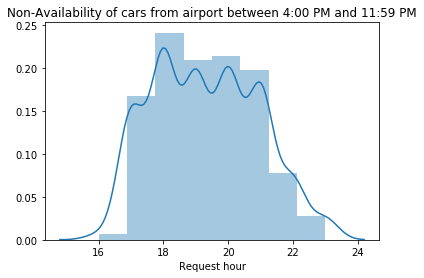

In [32]:
evening_unavailable_cars_df = no_car[(((no_car['Request time'] == 'Evening') 
                                                     | (no_car['Request time'] == 'Night')) 
                                                    & (no_car['Pickup point'] == 'Airport'))]
plt.title('Non-Availability of cars from airport between 4:00 PM and 11:59 PM') 
sns.distplot(evening_unavailable_cars_df['Request hour'], bins=8) 
plt.show()

The above plot shows that more number of cars are unavailable around 6:00 PM followed by 8:00 PM, 7:00 PM, 9:00 PM and 5:00 PM

Hence, the most pressing problem is as follows :
    - More cars are cancelled from city - airport, for timeslots between 4:00 AM and 11:59 AM
    - More cars are unavailable from airport - city, for timeslots between 4:00 PM and 11:59 PM
    
 ##### Supply demand gap can be calculated as follows :
    - Demand = Number of cars requested
    - Supply = Cars that completed the trips.
    - Supply Demand Gap = Cancelled cars plus unavailable cars

In [33]:
#creating demand column
Uber.loc[(Uber.Status == 'Trip Completed') | (Uber.Status == 'Cancelled')| (Uber.Status == 'No Cars Available'), 'demand'] = 'Demand' 

In [34]:
#creating supply column
Uber.loc[(Uber.Status == 'Trip Completed'), 'supply'] = 'Supply'

In [35]:
#creating gap column
Uber.loc[(Uber.Status == 'Cancelled')| (Uber.Status == 'No Cars Available'), 'gap'] = 'Gap' 

In [36]:
Uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request hour,Request time,Request day,TripComp,NoCars,Cancel,demand,supply,gap
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11,Morning,Monday,1.0,NaN,NaN,Demand,Supply,NaN
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17,Evening,Monday,1.0,NaN,NaN,Demand,Supply,NaN
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9,Morning,Tuesday,1.0,NaN,NaN,Demand,Supply,NaN
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21,Night,Tuesday,1.0,NaN,NaN,Demand,Supply,NaN
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8,Morning,Wednesday,1.0,NaN,NaN,Demand,Supply,NaN


In [37]:
Uber_SupplyandDemand = pd.DataFrame([Uber.demand,Uber.supply,Uber.gap]).transpose()
Uber_SupplyandDemand.head()

,demand,supply,gap
0,Demand,Supply,NaN
1,Demand,Supply,NaN
2,Demand,Supply,NaN
3,Demand,Supply,NaN
4,Demand,Supply,NaN


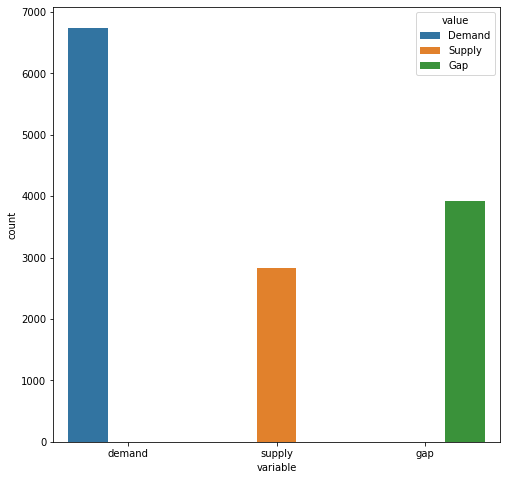

In [38]:
# plotting demand, supply and gap count
plt.figure(num=None, figsize=(8, 8), facecolor='w', edgecolor='k')
sns.countplot(x="variable",hue="value", data=pd.melt(Uber_SupplyandDemand))
plt.show()

#this clearly shows that gap exist and there is huge possible to bridge the gap and increase the revenue.
# Gap = Demand -Supply
#Around 58% of 'gap' exist.

In [39]:
# Create a new column to determine supply vs supply demand gap
# function returns the value Supply or Supply Demand Gap based on the trip status

def setSupplyorSupplyDemandGap(x):
    if x == 'Trip Completed':
        return 'Supply'
    else:       
        return 'Supply demand gap'
    
Uber['Supply demand gap'] = Uber['Status'].apply(setSupplyorSupplyDemandGap)
Uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request hour,Request time,Request day,TripComp,NoCars,Cancel,demand,supply,gap,Supply demand gap
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11,Morning,Monday,1.0,NaN,NaN,Demand,Supply,NaN,Supply
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17,Evening,Monday,1.0,NaN,NaN,Demand,Supply,NaN,Supply
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9,Morning,Tuesday,1.0,NaN,NaN,Demand,Supply,NaN,Supply
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21,Night,Tuesday,1.0,NaN,NaN,Demand,Supply,NaN,Supply
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8,Morning,Wednesday,1.0,NaN,NaN,Demand,Supply,NaN,Supply


#### Analyse the demand for cabs for each timeslots for trips from airport and city.

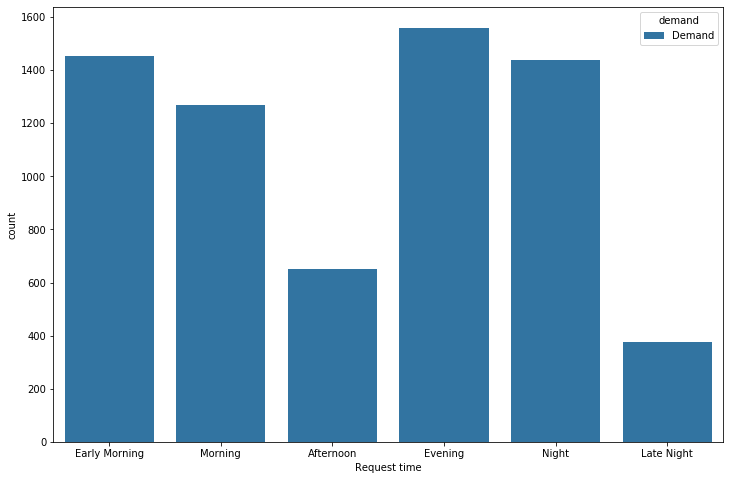

In [40]:
#segmenting demand across the request time slot
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
sns.countplot(hue='demand',x="Request time", data=Uber,order=order_timeslot)
plt.show()

#Below graph shows that morning and evening has the hightest demand for cabs

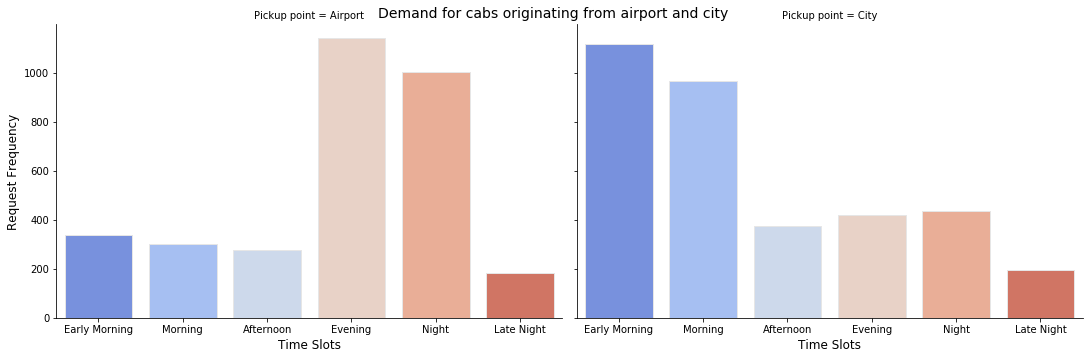

In [41]:
plot = sns.catplot(x='Request time', col="Pickup point", kind="count", palette="coolwarm", edgecolor=".9", aspect = 1.5, 
          data=Uber, order = order_timeslot)

plot.fig.suptitle('Demand for cabs originating from airport and city', fontsize=14)
plot.set_xlabels('Time Slots', fontsize=12)
plot.set_ylabels('Request Frequency', fontsize=12)

plt.show()

Irrespective of the trip status, following can be deduced from the above plots :  

    - For airport pickups, demand is more during the evening and night hours
    - For city pickups, demand is more during the early morning and morning

####  Find the time slots when the highest supply demand gap exists

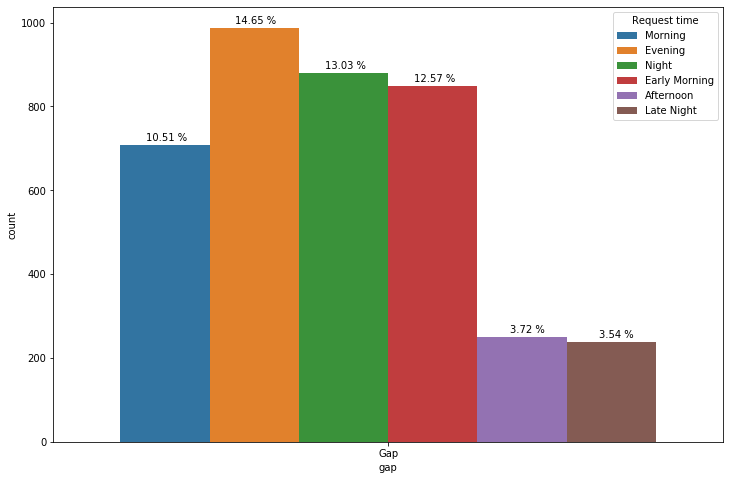

In [42]:
#segmenting gap across the request time slot
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
ax =sns.countplot(x='gap',hue="Request time", data=Uber,)
total = len(Uber['gap'])
for p in ax.patches:
    value = round((p.get_height()/total)*100,2)
    X = p.get_x()+0.1
    Y = p.get_height()+10
    ax.text(X, Y, '{:} %'.format(value), ha="right")
plt.show()

#This shows that gap is mainly in the morning and evening time slot, which again is in sync with all our above findings.

#### In the above graph - the percentage is taken only across the total gap percentage which is 58.02%

    a. From the total gap percentage(58.02%) -around 15% gap exist during morning and evenings.


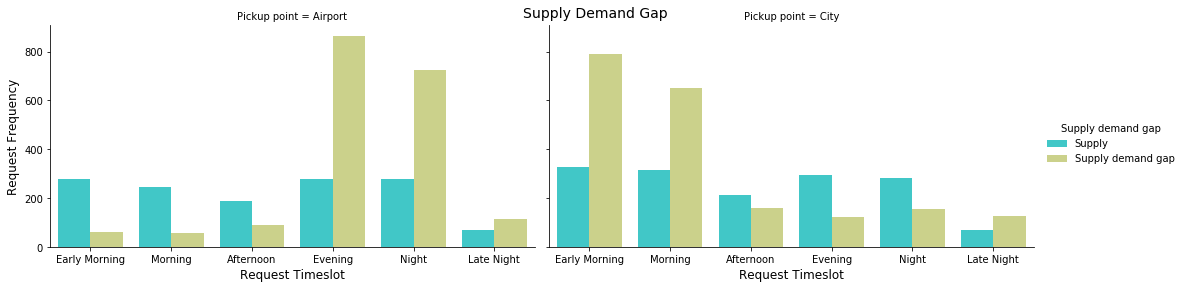

In [43]:
plot = sns.catplot(x="Request time", hue="Supply demand gap", col = 'Pickup point', data=Uber, palette='rainbow', 
            kind="count", height=4, aspect = 1.8, order = order_timeslot);

plot.fig.suptitle('Supply Demand Gap', fontsize=14)
plot.set_xlabels('Request Timeslot', fontsize=12)
plot.set_ylabels('Request Frequency', fontsize=12)
        
plt.show()

###### The above plot shows the following :
    
    - Supply demand gap is more in the evening (4:00 PM to 7:59 PM) and night (8:00 PM to 11:59 PM) for trips from Airport
      to City.
    - Supply demand gap is more in the early morning (4:00 AM to 7:59 AM) and morning (8:00 AM to 11:59 AM) for trips from
      City to Airport     

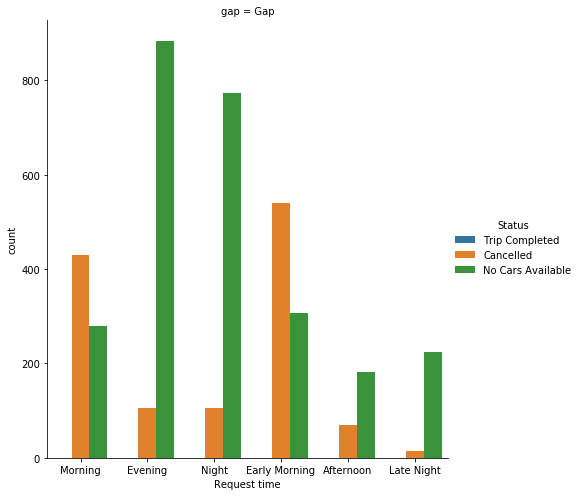

In [44]:
#segmenting gap across the status and request timeslot
sns.catplot(x='Request time',col="gap", hue = 'Status',data=Uber ,kind="count", height=7,aspect= 0.9,ci=85)
plt.show()


#As gap is sum of (cancelled + No cars available) : We can see that there is no plot in trip completed(Obvious).
# Hightest 'cancelled' gap comes from morning slot.
# Hightest 'No car available' gap comes from evening slot.

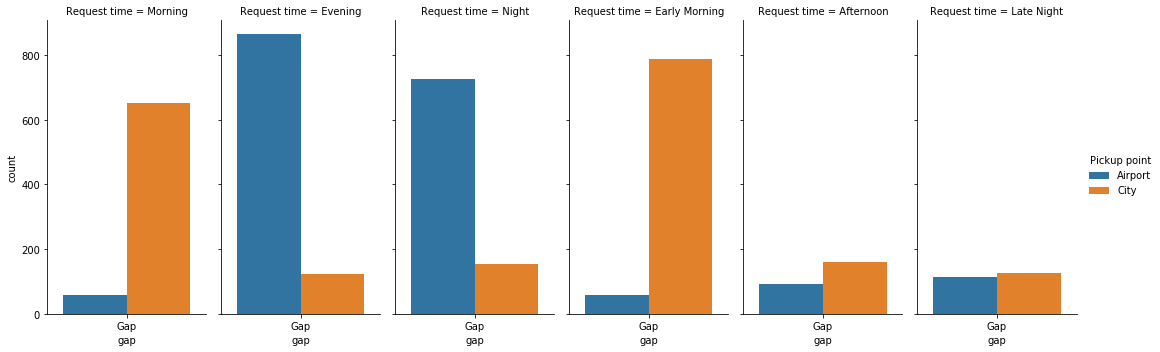

In [45]:
#segmenting gap across the pickup point and request timeslot
sns.catplot(x='gap',col="Request time", hue = 'Pickup point',data=Uber ,kind="count", height=5,aspect= 0.5,
            ci=85)
plt.show()


# the graph belows shows that:
# 1.In the morning, City pickup has the highest gap.
# 2. in the evening, Airport pickup has the highest gap.

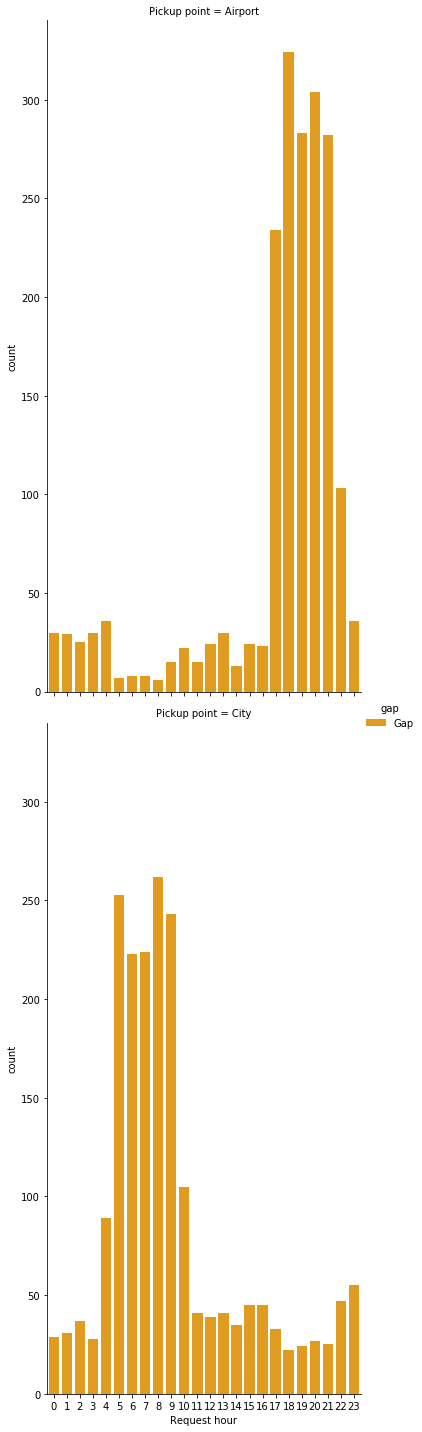

In [46]:
#segmenting the gap across the request hour and pickup point
#plt.figure(num=None, figsize=(13, 5), facecolor='w', edgecolor='k')
sns.catplot(x='Request hour',col="Pickup point", hue = 'gap',data=Uber ,kind="count", height=10,aspect= 0.5,
            ci=85,col_wrap=1,palette=sns.color_palette(['orange']))
plt.show()


# the graph belows shows that:
# 1. Airport has hightest gap at 17-21 hours which is evening hours
# 2. City has hightest gap at 5-9am hours which is morning hours
# And vice versa is not true

Find the types of requests (city-airport or airport-city) for which the gap is the most severe in the identified time slots

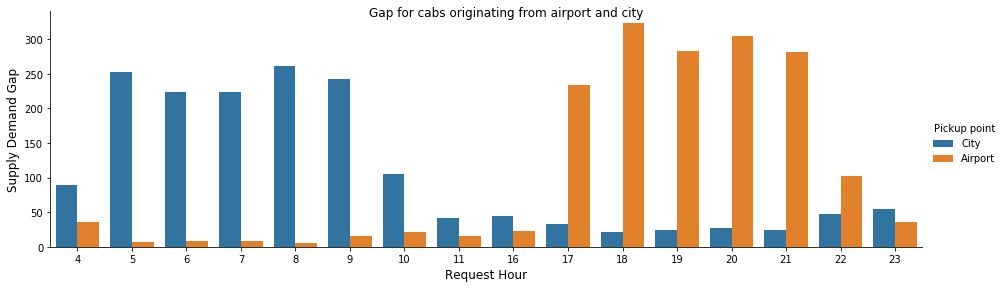

In [47]:
# filter based on the request time slots and supply demand gap

most_severe_gap_df = Uber[((Uber['Request time'] == 'Evening') |
                           (Uber['Request time'] == 'Night') | 
                           (Uber['Request time'] == 'Early Morning') | 
                           (Uber['Request time'] == 'Morning')) & 
                          (Uber['Supply demand gap'] == 'Supply demand gap')] 

plot = sns.catplot(x="Request hour", hue="Pickup point", data=most_severe_gap_df, kind="count", 
            height=4, aspect = 3.2)

plot.fig.suptitle('Gap for cabs originating from airport and city', fontsize=12)
plot.set_xlabels('Request Hour', fontsize=12)
plot.set_ylabels('Supply Demand Gap', fontsize=12)

plt.show()

The above plot shows that the most severe supply demand gap is for the trip request from Airport - City, between 6:00 PM to 9:00 PM

## The End